In [8]:
import os
import pickle
from variational.exponential_family import GenericNormalDistribution, NormalDistribution
from experiments.logisticRegression.utils import get_tgt_log_density, get_dataset
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt
import numpy as np

flipped_predictors = get_dataset()
N, dim = flipped_predictors.shape

# Gaussian Prior
my_prior_covariance = 25 * jnp.identity(dim)
my_prior_covariance = my_prior_covariance.at[0, 0].set(400)
my_prior_log_density = NormalDistribution(jnp.zeros(dim), my_prior_covariance).log_density
tgt_log_density = jax.vmap(get_tgt_log_density(flipped_predictors, my_prior_log_density))

PKLs = []
PKL_titles = []
for file in os.listdir("./"):
    if file.endswith(".pkl"):
        PKLs.append(pickle.load(open(file, "rb")))
        PKL_titles.append(str(file))

full_gaussian = GenericNormalDistribution(dimension=9)


In [9]:
lossesPKLs = []
lossesPKL_titles = []
for file in os.listdir("./losses/"):
    if file.endswith(".pkl"):
        lossesPKLs.append(pickle.load(open("./losses/"+file, "rb")))
        lossesPKL_titles.append(str(file))

In [18]:
plt.plot(lossesPKLs[0][1:])
plt.title(lossesPKL_titles[0])
np.savetxt('loss_1e4_10.csv', lossesPKLs[0])

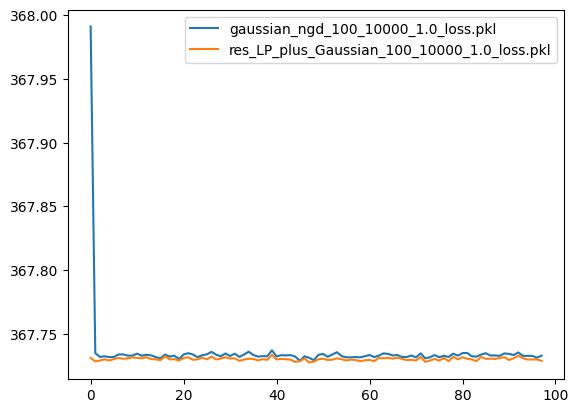

In [20]:
plt.plot(lossesPKLs[0][3:], label=lossesPKL_titles[0])
plt.plot(lossesPKLs[1][3:], label=lossesPKL_titles[1])
plt.legend()

In [11]:
np.mean(lossesPKLs[2][-10:])

Array(368.05533, dtype=float32)

In [13]:
lossesPKLs[0][-1]

Array(371.12906, dtype=float32)

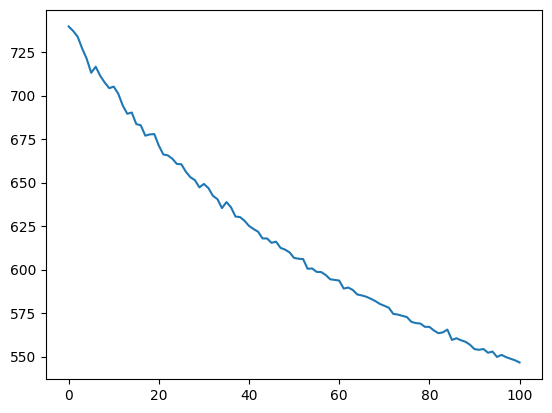

In [28]:
plt.plot(lossesPKLs[0])
np.savetxt('loss_ngd_1e4_100.csv', np.array([np.arange(1, 100+1), lossesPKLs[0][1:]]).T, delimiter=",")

In [20]:
PKL_titles

['res_LP_plus_Gaussian_Nicolas_100_100000_Seq1_[0 2].pkl',
 'res_LP_plus_Gaussian_Nicolas_100_100000_Seq3.pkl',
 'res_LP_plus_Gaussian_100_10000_Seq.pkl',
 'res_LP_plus_Gaussian_100_10000_1.0.pkl',
 'gaussian_ngd_100_10000_1.0.pkl',
 'gaussian_ngd_1000_10000_1.0.pkl']

In [21]:
full_gaussian.get_mean_cov(PKLs[5]['res'][-1][:-1])

(Array([-0.7791345 ,  0.6244009 ,  1.7090555 , -0.25868183,  0.02785721,
        -0.02275999,  1.0593144 ,  0.5099042 ,  0.41014957], dtype=float32),
 Array([[ 7.5461581e-02, -4.2673019e-03, -9.5452853e-03, -2.6221632e-03,
         -7.7881187e-04,  1.6841422e-04, -9.7413529e-03, -2.0960437e-05,
         -3.7096336e-03],
        [-4.2673033e-03,  3.0104113e-01, -1.1615549e-03, -1.4099110e-02,
          5.3570862e-03,  1.3383747e-02,  3.8421792e-03,  1.0294262e-02,
         -1.2200824e-01],
        [-9.5452908e-03, -1.1614764e-03,  3.0547079e-01, -1.6189300e-02,
          2.6048014e-02, -7.3956326e-02, -3.1349603e-02, -7.4784691e-03,
         -4.6337523e-02],
        [-2.6221732e-03, -1.4099144e-02, -1.6189286e-02,  2.9237756e-01,
         -3.4848634e-02,  1.9307858e-03, -4.1622993e-02,  3.1568157e-03,
         -4.7321778e-02],
        [-7.7882712e-04,  5.3571435e-03,  2.6048066e-02, -3.4848709e-02,
          3.0876347e-01, -9.8065175e-02, -7.4941926e-02, -2.4038307e-02,
          2.7284

In [4]:
lossesPKL_titles

['gaussian_ngd_100_10000_1.0_loss.pkl', 'gaussian_ngd_1000_10000_1.0_loss.pkl']

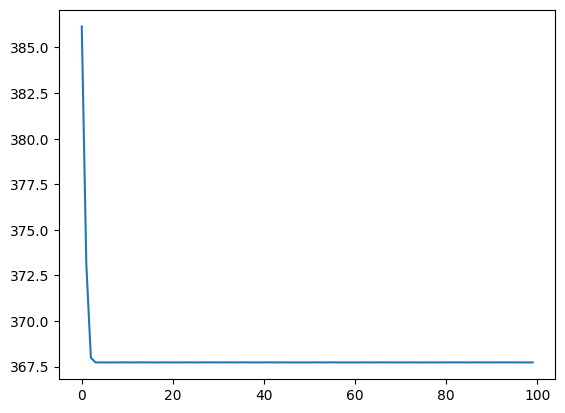

In [7]:
plt.plot(lossesPKLs[0][1:])